<p style="font-size:15pt; text-align:center">
    Introduction to Data Science
</p>
<p style="font-size:20pt; text-align:center">
    Single-variable analysis
</p>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt  # standard way of importing matplotlib
%matplotlib inline  
# the second line is a so-called magic to allow jupyter
#showing plots inline instead of opening a new window

# Loading a data set and initial data analysis

Initial data analysis is the first step of exploratory data analysis that you **must** do whenever you put hands on a new data set.

The aim is to do consistency checks to see that the quality of the measurements and of the data is adequate. See wikipedia for more details: https://en.wikipedia.org/wiki/Data_analysis#Initial_data_analysis

We will use the ``demographics.csv`` data. Data set adapted from [Kaggle](https://www.kaggle.com/carlolepelaars/toy-dataset/downloads/toy-dataset.zip/1).

This data set contains demographic information about individuals and whether they are ill or healthy.

***
Question: What types of variable are these?
***

In [5]:
#load data
#datademographic_array = np.loadtxt('files/demographics.csv') # First attempt to load data
datademographic_array = np.loadtxt('files/demographics.csv',skiprows=1, delimiter=',', dtype= 'int64') # Success!
datademographic_array

array([[     1,      1,      0,     41,  40367,      0],
       [     2,      1,      0,     54,  45084,      0],
       [     3,      1,      0,     42,  52483,      0],
       ...,
       [149998,      7,      0,     26, 111885,      0],
       [149999,      7,      0,     25, 111878,      0],
       [150000,      7,      1,     37,  87251,      0]], dtype=int64)

In [6]:
# load data
datademographic = pd.read_csv('files/demographics.csv') # First attempt to load data
datademographic.head()

,ID,City,Gender,Age,Income,Illness
0,1,1,0,41,40367,0
1,2,1,0,54,45084,0
2,3,1,0,42,52483,0
3,4,1,0,40,40941,0
4,5,1,0,46,50289,0


In [7]:
datademographic.dtypes

ID         int64
City       int64
Gender     int64
Age        int64
Income     int64
Illness    int64
dtype: object

How big is the data set?

In [8]:
print(datademographic.shape)
print(datademographic.size)

(150000, 6)
900000


How many unique values are there per variable?

In [15]:
for col in datademographic.columns:
    print (col, "\n", datademographic.loc[:,col].size, "\n", datademographic.loc[:, col].value_counts(), "\n\n\n", sep="")

ID
150000
1         1
100013    1
99997     1
99998     1
99999     1
         ..
50001     1
50002     1
50003     1
50004     1
150000    1
Name: ID, Length: 150000, dtype: int64



City
150000
2    50307
3    32173
1    19707
4    14219
7    12292
5     8301
6     8120
8     4881
Name: City, dtype: int64



Gender
150000
0    83800
1    66200
Name: Gender, dtype: int64



Age
150000
26    3918
64    3879
43    3862
41    3862
54    3838
29    3805
28    3798
27    3790
63    3784
44    3782
36    3780
59    3775
47    3773
37    3771
33    3769
58    3762
49    3762
42    3760
32    3759
52    3753
31    3749
48    3743
40    3740
61    3737
38    3734
57    3732
30    3731
51    3729
53    3724
34    3710
46    3707
50    3692
55    3687
62    3684
39    3675
45    3670
35    3658
56    3602
60    3582
25    1868
65    1864
Name: Age, dtype: int64



Income
150000
98410     15
93808     13
94606     13
88730     12
96376     12
          ..
91227      1
119770     1
81621      1
11

In [13]:
for col in range(datademographic_array.shape[1]):
    print(col, np.unique(datademographic_array[:,col]).size, np.unique(datademographic_array[:,col], return_counts = True), "\n")

0 150000 (array([     1,      2,      3, ..., 149998, 149999, 150000], dtype=int64), array([1, 1, 1, ..., 1, 1, 1], dtype=int64)) 

1 8 (array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64), array([19707, 50307, 32173, 14219,  8301,  8120, 12292,  4881],
      dtype=int64)) 

2 2 (array([0, 1], dtype=int64), array([83800, 66200], dtype=int64)) 

3 41 (array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65], dtype=int64), array([1868, 3918, 3790, 3798, 3805, 3731, 3749, 3759, 3769, 3710, 3658,
       3780, 3771, 3734, 3675, 3740, 3862, 3760, 3862, 3782, 3670, 3707,
       3773, 3743, 3762, 3692, 3729, 3753, 3724, 3838, 3687, 3602, 3732,
       3762, 3775, 3582, 3737, 3684, 3784, 3879, 1864], dtype=int64)) 

4 71762 (array([        -654,          584,         2474, ..., 415240000000,
       500820000000, 547770000000], dtype=int64), array([1, 1, 1, ..., 1, 1, 1], dtype

We observe:

    - The IDs are all unique. How do we see this?
    - There are 8 cities.
    - There are 2 genders.
    - There are 41 age groups (25-65 year olds).
    - There are many different income levels.
    - There are ill and healthy people.

# Exploratory data analysis of categorical variables

How many people are from each city?

In [11]:
datademographic.loc[:,"City"].value_counts()

2    50307
3    32173
1    19707
4    14219
7    12292
5     8301
6     8120
8     4881
Name: City, dtype: int64

In [12]:
np.unique(datademographic_array[:,1], return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([19707, 50307, 32173, 14219,  8301,  8120, 12292,  4881],
       dtype=int64))

Easy. But can we make this more visual? Yes: We need to plot. Let's use matplotlib!

## matplotlib is THE python graphics library

* [Matplotlib](http://matplotlib.org) is a powerful 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.

One of the key features of matplotlib is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. This makes matplotlib highly suitable for generating figures for scientific publications. 

More information at the Matplotlib web page: http://matplotlib.org/ . There's a [nice gallery](http://matplotlib.org/gallery.html) worth checking out. 


## Use matplotlib's object-oriented interface.

### The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global. The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

The main object hierarchy is this:
<img src="files/figmap.png" width="400px"/>

In [24]:
import matplotlib.pyplot as plt  # standard way of importing matplotlib
%matplotlib inline
# the second line is a so-called magic to allow jupyter showing plots inline instead of opening a new window

In [25]:
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>

`fig` is an object containing other objects, for example:

In [26]:
# Let's add an Axes object to our Figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

Above, `fig` (a Figure class instance) has multiple Axes (a list, for which we take the first element). Each Axes has a yaxis and xaxis, each of which have a collection of “major ticks,” and we grabbed the first one.

More details here: https://matplotlib.org/examples/showcase/anatomy.html
<img src="files/figanatomy.png" width="600px"/>

Text(0.5, 1.0, 'Title')

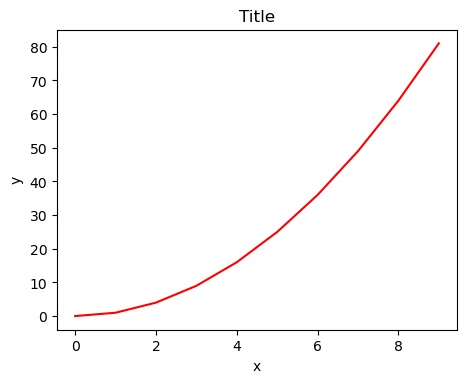

In [27]:
# Minimal plot example:
x = range(0, 10) # x data (will plot on horizontal x axis)
y = [i ** 2 for i in x] # y data (will plot on vertical y axis)

fig = plt.figure(figsize=(4, 3),dpi = 100) # create figure object with a (width,height) , dpi为分辨率
axes = fig.add_axes([0, 0, 1, 1])  # left, bottom, width, height (range 0 to 1) 

axes.plot(x, y, color = 'r') # plot using color red

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Title')

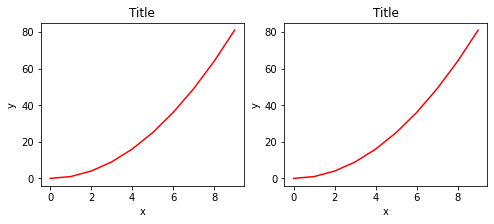

In [17]:
# Minimal example for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3)) # nrows specifies the number of rows you want, ncols how many figures in each row 

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Title')

We have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

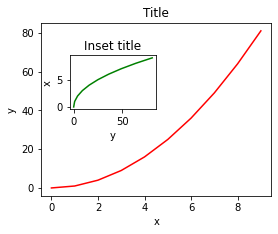

In [18]:
# Minimum example for inset plot
fig = plt.figure(figsize=(4, 3))
axes1 = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.1, 0.4, 0.3, 0.25]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Title')

# inset
axes2.plot(y, x, 'g') # green
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('Inset title');

## Saving figures
To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [28]:
#fig.savefig("filename.pdf", dpi=300)  # dpi is the resolution

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command).

## Let's get back to our single-variable exploratory data analysis

A (frequency) **distribution** is a list, table, or graph that displays the frequency of a variable.

### Distribution of cities

In [18]:
categories, counts = np.unique(datademographic_array[:,1], return_counts=True)
categories,counts

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([19707, 50307, 32173, 14219,  8301,  8120, 12292,  4881],
       dtype=int64))

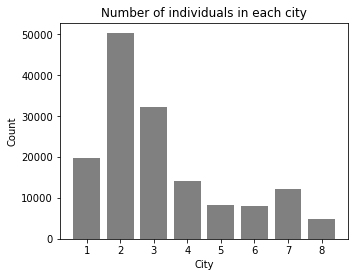

In [21]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.bar(categories, counts, fc="gray") # fc is the face color

axes.set_xlabel('City')
axes.set_ylabel('Count')
axes.set_title('Number of individuals in each city');

<AxesSubplot:>

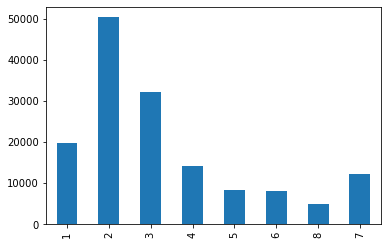

In [20]:
datademographic.loc[:,"City"].value_counts(sort=False).plot(kind="bar")

### Distribution of gender

In [23]:
categories, counts = np.unique(datademographic_array[:,2], return_counts=True)

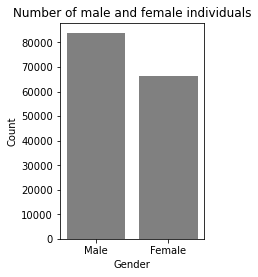

In [24]:
fig = plt.figure(figsize=(2, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.bar(categories, counts, fc="gray") # fc is the face color

axes.set_xlabel('Gender')
axes.set_ylabel('Count')
axes.set_title('Number of male and female individuals')

axes.set_xticks(categories)
axes.set_xticklabels(("Male", "Female"));  # 0 is male, 1 is female

### Distribution of age groups

In [25]:
categories, counts = np.unique(datademographic_array[:,3], return_counts=True)

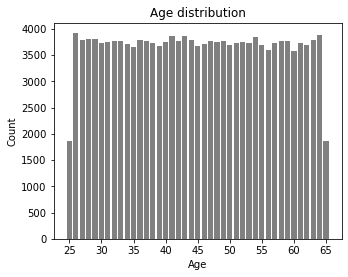

In [26]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.bar(categories, counts, fc="gray") # fc is the face color

axes.set_xlabel('Age')
axes.set_ylabel('Count')
axes.set_title('Age distribution');

### Distribution of illness

In [30]:
categories, counts = np.unique(datademographic_array[:,5], return_counts=True)

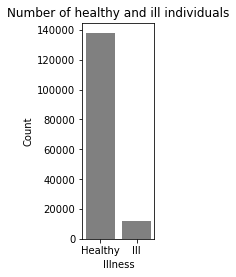

In [32]:
fig = plt.figure(figsize=(1, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.bar(categories, counts, fc="gray") # fc is the face color

axes.set_xlabel('Illness')
axes.set_ylabel('Count')
axes.set_title('Number of healthy and ill individuals')

axes.set_xticks(categories)
axes.set_xticklabels(("Healthy", "Ill"));  # 0 is healthy, 1 is ill

## Alternative graphs for categorical distributions

### Pie chart

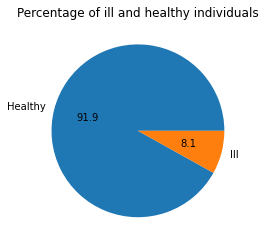

In [29]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.pie(counts, labels=("Healthy", "Ill"), autopct="%.1f") 
# autopct displays percentage values using the given format string
# More information about string formatting: 
# https://docs.python.org/3/library/stdtypes.html#old-string-formatting

axes.set_title('Percentage of ill and healthy individuals');

<AxesSubplot:ylabel='Illness'>

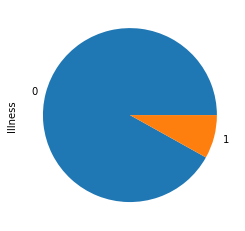

In [30]:
datademographic.loc[:,"Illness"].value_counts(sort=False).plot(kind="pie")

Be careful using pie charts! Their use is discouraged by many data visualization experts. If you have up to 4 categories they can be fine, but any more than that is absolutely not recommended, like here:

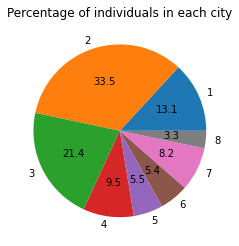

In [31]:
categories, counts = np.unique(datademographic_array[:,1], return_counts=True)
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.pie(counts, labels=(categories), autopct="%.1f") 
# autopct displays percentage values using the given format string

axes.set_title('Percentage of individuals in each city');

## Distributions of cities, but percentages

When we switched to pie chart, we switched from counts (or frequencies) to percentage values (or relative values). We can also show percentages in bar plots.

In [32]:
categories, counts = np.unique(datademographic_array[:,1], return_counts=True)

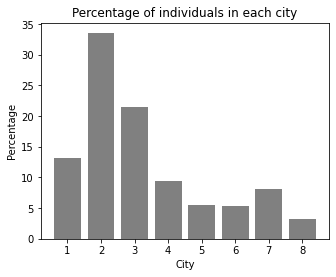

In [33]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.bar(categories, 100*counts/sum(counts), fc="gray") # fc is the face color

axes.set_xlabel('City')
axes.set_ylabel('Percentage')
axes.set_title('Percentage of individuals in each city');

How to do the same thing with Dataframe?

In [21]:
datademographic.head(2)

,ID,City,Gender,Age,Income,Illness
0,1,1,0,41,40367,0
1,2,1,0,54,45084,0


<AxesSubplot:>

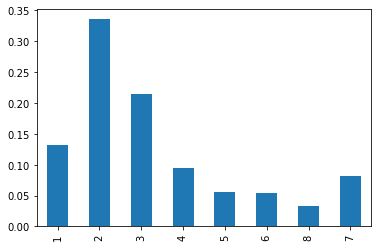

In [22]:
city_counts = datademographic.loc[:,"City"].value_counts(sort=0) # here 0 refers to False
(city_counts/city_counts.sum()).plot(kind="bar")

# Exploratory data analysis of quantiative variables

We have not yet explored the quantitative variable of income. Do do so, we plot a histogram of the distribution.

A **histogram** is a graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous or discrete variable (quantitative variable). To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size.

<img src="files/histogram.png" width="600px"/>

**Histograms look like bar charts, but they are not the same.** The horizontal axis on a histogram is continuous, whereas bar charts can have space in between categories.

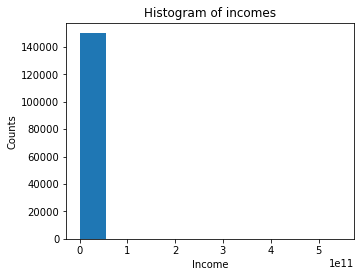

In [36]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.hist(datademographic_array[:,4]);

axes.set_xlabel('Income')
axes.set_ylabel('Counts')
axes.set_title('Histogram of incomes');

***
What is going on?
***

(array([0.00275439, 0.00275439, 0.01928074, 0.02478953, 0.09640371,
        0.13771959, 0.19556181, 0.34429897, 0.36082532, 0.38286045,
        0.31950944, 0.27543917, 0.28921113, 0.15975472, 0.08538614,
        0.0330527 , 0.01377196, 0.00275439, 0.00550878, 0.00275439]),
 array([1.53333504, 1.8963916 , 2.25944817, 2.62250473, 2.98556129,
        3.34861786, 3.71167442, 4.07473098, 4.43778754, 4.80084411,
        5.16390067, 5.52695723, 5.8900138 , 6.25307036, 6.61612692,
        6.97918349, 7.34224005, 7.70529661, 8.06835318, 8.43140974,
        8.7944663 ]),
 <BarContainer object of 20 artists>)

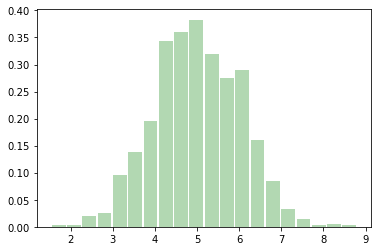

In [44]:
plt.hist(np.random.normal(loc = 5, scale = 1,size= 1000),bins = 20,density = True, cumulative = False,rwidth = 0.9,color = "g",alpha = 0.3)

# Descriptive statistics

Let us look at minimum, maximum, and mean.

In [28]:
incomemin = datademographic_array[:,4].min()
incomemax = datademographic_array[:,4].max()
incomemean = round(datademographic_array[:,4].mean())
(incomemin, incomemean, incomemax)

(-654, 9850118, 547770000000)

In [29]:
datademographic.loc[:,"Income"].describe()

count    1.500000e+05
mean     9.850118e+06
std      2.195886e+09
min     -6.540000e+02
25%      8.086875e+04
50%      9.365500e+04
75%      1.045192e+05
max      5.477700e+11
Name: Income, dtype: float64

<img src="files/mean01.png" width="600px"/>

The mean is not robust to outliers.
<img src="files/mean02.png" width="600px"/>
Source: https://mathwithbaddrawings.com/2016/07/13/why-not-to-trust-statistics/

Let us calculate the quartiles. They are more robust to outliers.

<img src="files/quartiles.png" width="600px"/>

The first, or lower, quartile Q1 splits off the lowest 25% of data from the highest 75%.<br />
The second quartile, or median, Q2 cuts the data set in half.<br />
The third, or higher, quartile Q3 splits off the highest 25% of data from the lowest 75%.

In [25]:
quartiles = np.percentile(datademographic_array[:,4], [25, 50,75])
quartiles

array([ 80868.75,  93655.  , 104519.25])

In [30]:
fivenumbersummary = [incomemin, quartiles[0], quartiles[1], quartiles[2], incomemax]
fivenumbersummary

[-654, 80868.75, 93655.0, 104519.25, 547770000000]

The five number summary (min, Q1, Q2, Q3, max) is visualized with the box plot.

<img src="files/boxplot.png" width="300px"/>

This is a standardized way of displaying the distribution of data based on the five number summary. In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). In matplotlib, by default, whiskers span 1.5 IQR.


The whisker length in box plots:

<img src="files/boxlength.png" width="800px"/>

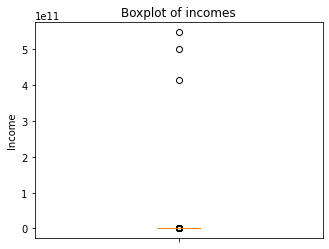

In [54]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot(datademographic_array[:,4]);

axes.set_ylabel('Income')
axes.set_xticklabels('')
axes.set_title('Boxplot of incomes');

Looks like we have some serious outliers.

*Back to presentation* (outliers)

## Outlier detection and data cleaning 

Looks like we have three extreme outliers. Let's investigate and clean the data if needed.

In [32]:
mask = (datademographic_array[:,4] < 10 ** 11) 
print(np.count_nonzero(mask))
print(np.where(mask == False))

149997
(array([ 9, 10, 11], dtype=int64),)


Aha! The bad values are at positions 9,10,11. They are a clear anomaly (global outliers). Let's clean the data and remove them. 

In [49]:
datademographic_cleaned = datademographic_array[mask,:]
datademographic_cleaned.shape # double-check

(149997, 6)

We removed those three extreme values. How does the box plot look like now?

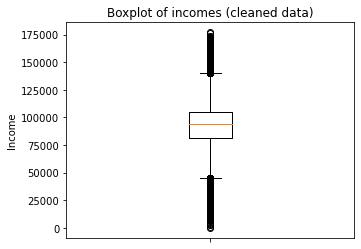

In [50]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot(datademographic_cleaned[:,4]);

axes.set_ylabel('Income')
axes.set_xticklabels('')
axes.set_title('Boxplot of incomes (cleaned data)');

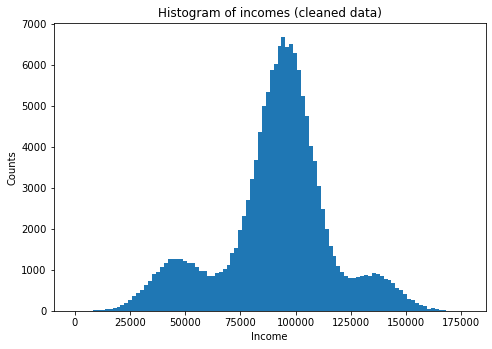

In [56]:
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.hist(datademographic_cleaned[:,4], 100); # The second argument sets the number of bins.
# 利用cleaned将差值大的数值去除
axes.set_xlabel('Income')
axes.set_ylabel('Counts')
axes.set_title('Histogram of incomes (cleaned data)');

# Exploratory single-variable data analysis with slices

In [33]:
data = np.loadtxt('files/stockholm_temperatures.dat') 

The file stockholm_temperatures.dat contains the temperature in Stockholm since 1800 until 2011. The first three columns are respectively year, month and day, and the last column is the temperature.

***
Question: What variable types are these? And what is the first thing we need to do?
***

In [58]:
data

array([[ 1.800e+03,  1.000e+00,  1.000e+00, -6.100e+00],
       [ 1.800e+03,  1.000e+00,  2.000e+00, -1.540e+01],
       [ 1.800e+03,  1.000e+00,  3.000e+00, -1.500e+01],
       ...,
       [ 2.011e+03,  1.200e+01,  2.900e+01,  4.900e+00],
       [ 2.011e+03,  1.200e+01,  3.000e+01,  6.000e-01],
       [ 2.011e+03,  1.200e+01,  3.100e+01, -2.600e+00]])

## Plot the data

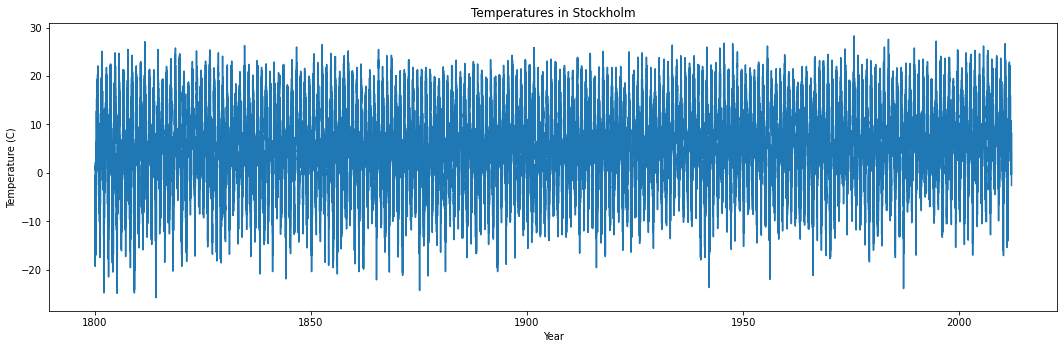

In [62]:
fig = plt.figure(figsize=(14, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

axes.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365,data[:,3])
axes.set_title('Temperatures in Stockholm')
axes.set_xlabel('Year')
axes.set_ylabel('Temperature (C)');

## Get descriptive statistics

In [34]:
quartiles = np.percentile(data[:,3], [25, 50, 75])
quartiles

array([ 0.2,  5.7, 13.2])

In [35]:
fivenumbersummary = [data[:,3].min(), quartiles[0], quartiles[1], quartiles[2], data[:,3].max()]
fivenumbersummary, round(data[:,3].mean())

([-25.8, 0.2, 5.7, 13.2, 28.3], 6)

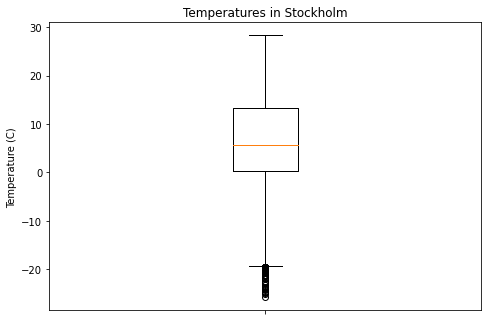

In [36]:
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot(data[:,3]);

axes.set_title('Temperatures in Stockholm')
axes.set_xticklabels('')
axes.set_ylabel('Temperature (C)');

In [37]:
f = lambda x:3
stuff = [[y := f(x),x*y]for x in range(3)]
print(stuff)

[[3, 0], [3, 3], [3, 6]]


## Plot distribution

Text(0.5, 1.0, 'Temperatures in Stockholm')

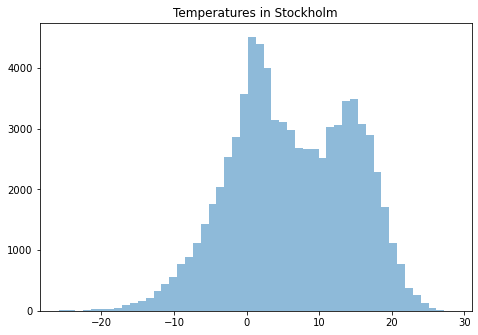

In [41]:
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.hist(data[:,3],bins =  50, alpha = 0.5);

axes.set_title('Temperatures in Stockholm')
#axes.set_ylabel('Frequency')
#axes.set_xlabel('Temperature (C)');

## Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, if we want to calculate the average temperature in 1971 only, we can create a mask in the following way:

In [69]:
mask = (data[:,0] == 1971)
data[mask,3]

array([ -9.2,  -6.5,  -4.7,  -0.3,  -6.8, -11.6,  -1.9,   4.3,   4.6,
         5.9,   4.8,   1.9,   0.8,  -0.9,  -1.5,  -1.5,  -3.9,   2.4,
         1.3,   2. ,   2. ,   1.8,   2.5,   3.7,   4.9,   3.7,   1.7,
        -2.1,  -5.1,  -6.3,   0.2,  -2.7,  -4. ,  -0.6,   1.6,   3.4,
         2.4,  -0.4,  -1.9,  -4.8,  -1.9,   2.5,   2.4,   3.1,   2.5,
         1.7,   1.5,   0.5,   0. ,  -0.3,   0.5,   1.1,   1.1,  -2.1,
         0.6, -11.9,  -8.2,  -8.3,  -7.9,  -7.7,  -8.5, -10.8, -13.5,
        -8.6,  -5.4,  -0.5,   2.1,   0. ,  -4.6,  -3.5,  -3. ,  -0.8,
         0.4,  -0.1,   0.8,   1.6,   1.7,   1.8,   1.3,   0. ,  -2.2,
        -4.4,  -0.3,   3.6,   3.3,  -0.8,  -1.4,   1. ,  -0.5,   0.6,
         4.2,   4. ,   3.6,  -0.7,   0.1,   0.9,   2.5,   5.6,   3.7,
         4.2,   6.1,   5.8,   2.7,   2.3,   3. ,   4.6,   5.2,   6.5,
         9. ,   9.8,   7.6,   3.3,   2.1,   0.5,  -0.3,   0.1,   2.2,
         3.6,   1.2,   3.3,   6.4,   9.9,   8.5,   7.4,   9.4,  12.2,
        14.7,  13.2,

In [70]:
data[mask,3]

array([ -9.2,  -6.5,  -4.7,  -0.3,  -6.8, -11.6,  -1.9,   4.3,   4.6,
         5.9,   4.8,   1.9,   0.8,  -0.9,  -1.5,  -1.5,  -3.9,   2.4,
         1.3,   2. ,   2. ,   1.8,   2.5,   3.7,   4.9,   3.7,   1.7,
        -2.1,  -5.1,  -6.3,   0.2,  -2.7,  -4. ,  -0.6,   1.6,   3.4,
         2.4,  -0.4,  -1.9,  -4.8,  -1.9,   2.5,   2.4,   3.1,   2.5,
         1.7,   1.5,   0.5,   0. ,  -0.3,   0.5,   1.1,   1.1,  -2.1,
         0.6, -11.9,  -8.2,  -8.3,  -7.9,  -7.7,  -8.5, -10.8, -13.5,
        -8.6,  -5.4,  -0.5,   2.1,   0. ,  -4.6,  -3.5,  -3. ,  -0.8,
         0.4,  -0.1,   0.8,   1.6,   1.7,   1.8,   1.3,   0. ,  -2.2,
        -4.4,  -0.3,   3.6,   3.3,  -0.8,  -1.4,   1. ,  -0.5,   0.6,
         4.2,   4. ,   3.6,  -0.7,   0.1,   0.9,   2.5,   5.6,   3.7,
         4.2,   6.1,   5.8,   2.7,   2.3,   3. ,   4.6,   5.2,   6.5,
         9. ,   9.8,   7.6,   3.3,   2.1,   0.5,  -0.3,   0.1,   2.2,
         3.6,   1.2,   3.3,   6.4,   9.9,   8.5,   7.4,   9.4,  12.2,
        14.7,  13.2,

In [71]:
print("This is the mean temperature in Stockholm in 1971: "+str(np.mean(data[mask,3])))

This is the mean temperature in Stockholm in 1971: 6.9301369863013695


If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use it to select only the data for that month using:

In [72]:
np.unique(data[:,1]) # the month column takes values from 1 to 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [74]:
mask_feb = (data[:,1] == 2)

In [75]:
# the temperature data is in column 3
np.mean(data[mask_feb,3])

-3.212109570736596

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

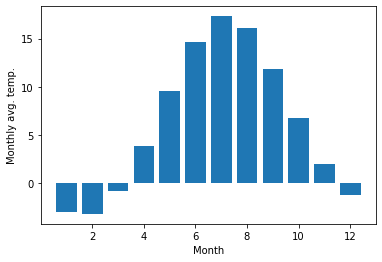

In [42]:
months = np.arange(1,13) # or np.unique(data[:,1])
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

**Source**

This notebook was adapted from:
* [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas
* Data 8: The Foundations of Data Science
* Introduction to data science by Michael Szell